# Project Overview
OCR is a field of research in pattern recognition, artificial intelligence and computer vision.

The field of optical character recognition (OCR) is very important, especially for offline handwritten recognition systems. Offline handwritten recognition systems are different from online handwritten recognition systems. The ability to deal with large amounts of script data in certain contexts will be invaluable. One example of these applications is the automation of the text transcription process applied on ancient documents considering the complex and irregular nature of writing.

# Datasets
The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset. Further information on the dataset contents and conversion process can be found in the paper available at https://arxiv.org/abs/1702.05373v1.

The EMNIST dataset from Kaggle you can find it [here](https://www.kaggle.com/crawford/emnist).

CSV (combined labels and images)
* Each row is a separate image
* 785 columns
* First column = class_label (see mappings.txt for class label definitions)
* Each column after represents one pixel value (784 total for a 28 x 28 image)
* train: 697,932
* test: 116,323
* total: 814,255
* classes: ByMerge 47 (unbalanced) 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [3]:
data_train = pd.read_csv("emnist-bymerge-train.csv", header=None)
data_test = pd.read_csv("emnist-bymerge-test.csv", header=None)

MemoryError: 

# Data Exploration

In [ ]:
print(data_train.shape)
print(data_test.shape)

In [ ]:
print(data_train.head())

In [5]:
print('max = ', np.max(image_train.max()),"\t"," min = ", np.min(image_train.min()))

max =  255 	  min =  0


In [6]:
print(label_train.head())

   0
0  1
1  1
2  1
3  1
4  1


In [7]:
label_train.describe()

,0
count,13440.000000
mean,14.500000
std,8.078048
min,1.000000
25%,7.750000
50%,14.500000
75%,21.250000
max,28.000000


In [8]:
x_train = image_train.as_matrix()
y_train = np.array(label_train[0])
x_test = image_test.as_matrix()
y_test = np.array(label_test[0])

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(13440, 1024)
(13440,)
(3360, 1024)
(3360,)


# Exploratory Visualization

## Visualize Random 20 Training Images

In [11]:
mapping = np.loadtxt('emnist-bymerge-mapping.txt',dtype=int, usecols=(1), unpack=True)
print(mapping)
len(mapping)

[ 48  49  50  51  52  53  54  55  56  57  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  97  98 100 101 102 103 104 110 113 114 116]


47

In [14]:
char_labels={}
for i in range(47):
    char_labels[i] = chr(mapping[i])
print(char_labels)

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}


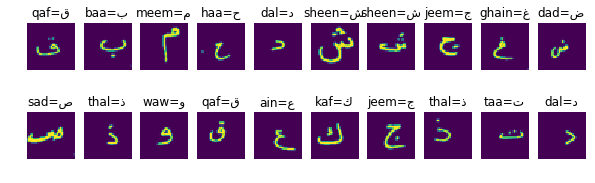

In [11]:
random_array = np.random.randint(x_train.shape[0], size=(2,10))
plt.figure(figsize=[10,3])
for i in range(10):
    plt.subplot(2,10,i+1)
    a = int(y_train[random_array[0,i]]-1)
    plt.title(arabic_labels[a] + '=' + arabic_letters[a])
    plt.imshow(x_train[random_array[0,i]].reshape(32,32).squeeze().T)
    plt.axis('off')
    plt.subplot(2,10,i+11)
    b = int(y_train[random_array[1,i]]-1)
    plt.title(arabic_labels[b] + '=' + arabic_letters[b])
    plt.imshow(x_train[random_array[1,i]].reshape(32,32).squeeze().T)
    plt.axis('off')


## View an Image in More Detail

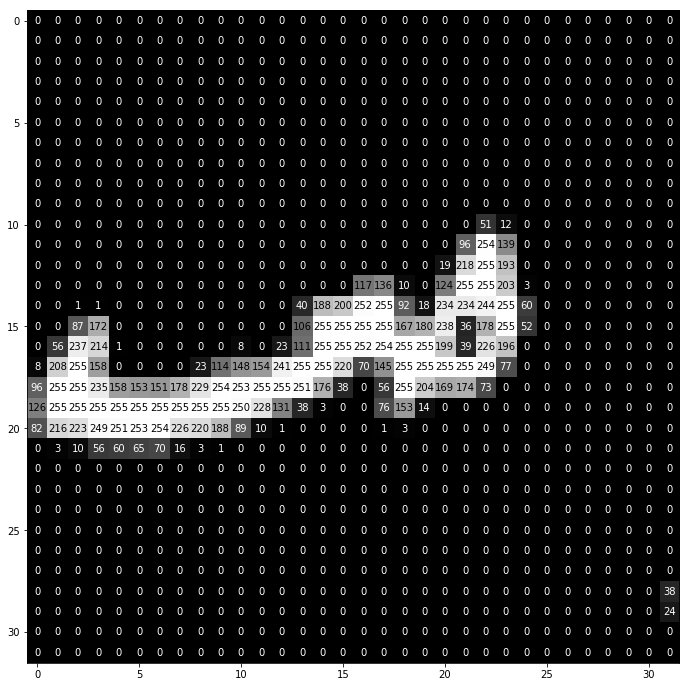

In [12]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
sample_img = x_train[random_array[1,0]]
visualize_input(sample_img.reshape(32,32).squeeze().T, ax)

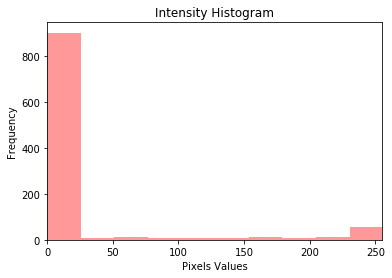

In [13]:
plt.xlim((0,255))
plt.hist(sample_img, range=(0,256), color='red', alpha=0.4)
plt.xlabel('Pixels Values')
plt.ylabel('Frequency')
plt.title('Intensity Histogram')
plt.show()

# Data Preprocessing
## Rescale the Images by Dividing Every Pixel in Every Image by 255

In [14]:
x_train = image_train.as_matrix()/255.0
x_test = image_test.as_matrix()/255.0

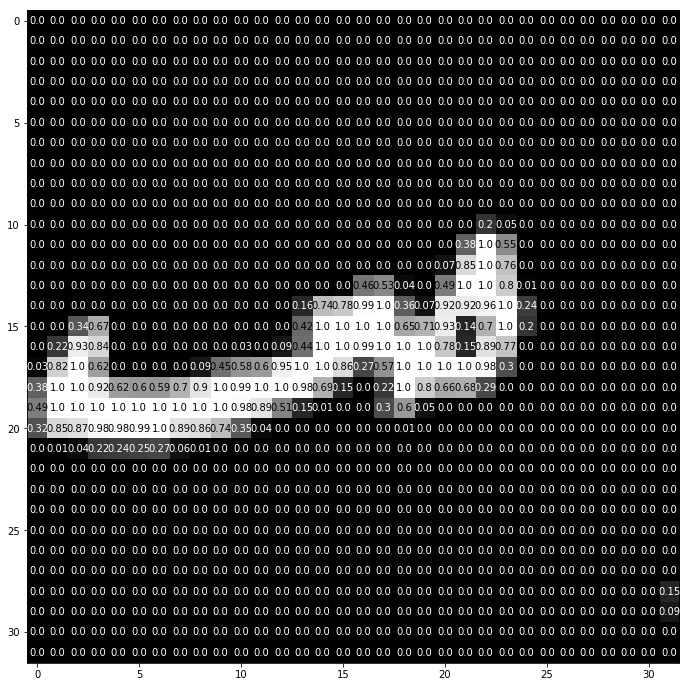

In [15]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
sample_img = x_train[random_array[1,0]]
visualize_input(sample_img.reshape(32,32).squeeze().T, ax)

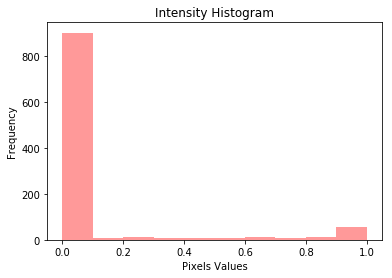

In [16]:
plt.hist(sample_img, color='red', alpha=0.4)
plt.xlabel('Pixels Values')
plt.ylabel('Frequency')
plt.title('Intensity Histogram')
plt.show()

## Normalize Images

In [17]:
from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)

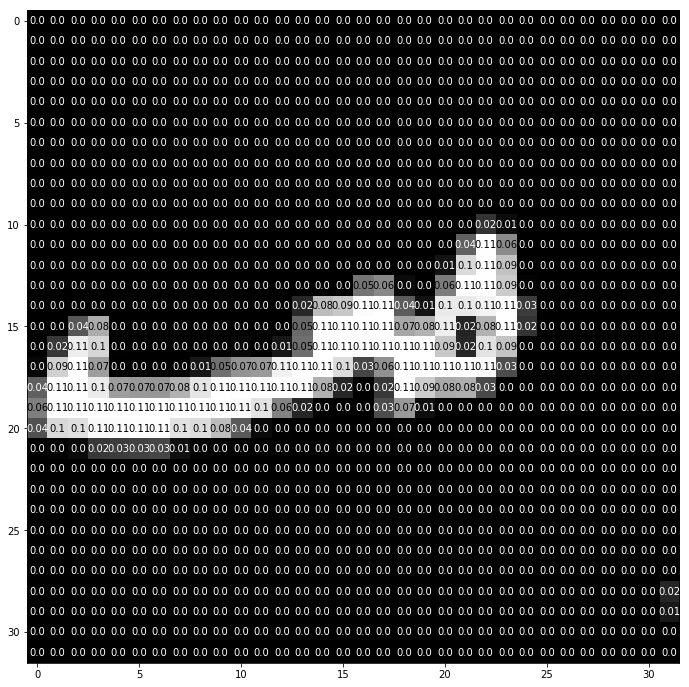

In [18]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
sample_img = x_train[random_array[1,0]]
visualize_input(sample_img.reshape(32,32).squeeze().T, ax)

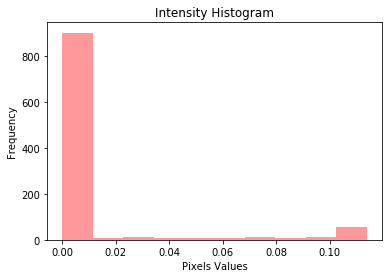

In [19]:
plt.hist(sample_img, color='red', alpha=0.4)
plt.xlabel('Pixels Values')
plt.ylabel('Frequency')
plt.title('Intensity Histogram')
plt.show()

# Deep Learning

## Encode Categorical Integer Labels Using a One-Hot Scheme

In [23]:
from keras.utils import np_utils

# one-hot encode the labels
y_train_encoded = np_utils.to_categorical(y_train-1, num_classes=28)
y_test_encoded = np_utils.to_categorical(y_test-1, num_classes=28)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [24]:
y_train_encoded.shape

(13440, 28)

In [25]:
y_train_encoded[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Reshape images data from row to 32 X 32

In [26]:
x_train_reshape = x_train.reshape(x_train.shape[0], 32, 32)
x_test_reshape = x_test.reshape(x_test.shape[0], 32, 32)

In [27]:
print(x_train_reshape[0].shape)
x_train_reshape[0]

(32, 32)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

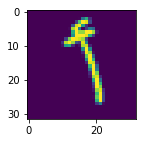

In [28]:
plt.figure(figsize=(2,2))
plt.imshow(x_train_reshape[0].squeeze().T)

## Create and Configure Augmented Image Generator

# MLP Model

## Define the Model Architecture

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=x_train_reshape.shape[1:]))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(28, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               131200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 28)                1820      
Total params: 141,276
Trainable params: 141,276
Non-trainable params: 0
_________________________________________________________________


## Compile the Model

In [40]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

## Calculate the Classification Accuracy on the Test Set (Before Training)

In [41]:
# evaluate test accuracy
score = model.evaluate(x_test_reshape, y_test_encoded, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 3.3036%


## Train the Model

In [42]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='HACR.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(x_train_reshape, y_train_encoded, batch_size=128, epochs=60,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 10752 samples, validate on 2688 samples
Epoch 1/60
10624/10752 [============================>.] - ETA: 0s - loss: 2.9183 - acc: 0.1393
Epoch 00001: val_loss improved from inf to 2.52676, saving model to HACR.model.best.hdf5
10752/10752 [==============================] - 3s 248us/step - loss: 2.9126 - acc: 0.1401 - val_loss: 2.5268 - val_acc: 0.2712
Epoch 2/60
10496/10752 [============================>.] - ETA: 0s - loss: 2.2767 - acc: 0.2897
Epoch 00002: val_loss improved from 2.52676 to 2.17460, saving model to HACR.model.best.hdf5
10752/10752 [==============================] - 2s 211us/step - loss: 2.2734 - acc: 0.2918 - val_loss: 2.1746 - val_acc: 0.3549
Epoch 3/60
10624/10752 [============================>.] - ETA: 0s - loss: 1.9898 - acc: 0.3641
Epoch 00003: val_loss improved from 2.17460 to 1.93288, saving model to HACR.model.best.hdf5
10752/10752 [==============================] - 2s 216us/step - loss: 1.9898 - acc: 0.3642 - val_loss: 1.9329 - val_acc: 0.4014
Epoch 4/60

Epoch 28/60
10368/10752 [===========================>..] - ETA: 0s - loss: 0.6113 - acc: 0.7874
Epoch 00028: val_loss did not improve
10752/10752 [==============================] - 2s 179us/step - loss: 0.6115 - acc: 0.7875 - val_loss: 1.1053 - val_acc: 0.6656
Epoch 29/60
10496/10752 [============================>.] - ETA: 0s - loss: 0.6133 - acc: 0.7838
Epoch 00029: val_loss improved from 1.09374 to 1.09327, saving model to HACR.model.best.hdf5
10752/10752 [==============================] - 2s 184us/step - loss: 0.6117 - acc: 0.7850 - val_loss: 1.0933 - val_acc: 0.6607
Epoch 30/60
10624/10752 [============================>.] - ETA: 0s - loss: 0.5889 - acc: 0.7872
Epoch 00030: val_loss did not improve
10752/10752 [==============================] - 2s 216us/step - loss: 0.5924 - acc: 0.7859 - val_loss: 1.1155 - val_acc: 0.6574
Epoch 31/60
10368/10752 [===========================>..] - ETA: 0s - loss: 0.5773 - acc: 0.8010
Epoch 00031: val_loss did not improve
10752/10752 [===============

## Load the Model with the Best Classification Accuracy on the Validation Set

In [43]:
# load the weights that yielded the best validation accuracy
model.load_weights('HACR.model.best.hdf5')

## Calculate the Classification Accuracy on the Test Set

In [44]:
# evaluate test accuracy
score = model.evaluate(x_test_reshape, y_test_encoded, verbose=0)
accuracy = 100*score[1]
accuracy_values['MLP'] = accuracy
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 71.6667%


# CNN Model

## Define the Model Architecture

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.layers import Conv1D, MaxPooling1D

# define the model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=128, kernel_size=3, padding='valid', activation='relu', input_shape=(32, 32)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu',))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(BatchNormalization())
#cnn_model.add(Dropout(0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(BatchNormalization())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(28, activation='softmax'))

# summarize the model
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 30, 128)           12416     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 15, 128)           0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 128)           512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 15, 64)            24640     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 7, 64)             0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 7, 64)             256       
__________

## Compile the Model

In [30]:
# compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

## Train the Model

In [36]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='HACR_CNN.cnn_model.best.hdf5',
                               verbose=1, save_best_only=True)
hist = cnn_model.fit(x_train_reshape, y_train_encoded, batch_size=128, epochs=30, 
                     validation_split=0.2, callbacks=[checkpointer], verbose=1, shuffle=True)

Train on 10752 samples, validate on 2688 samples
Epoch 1/30
10624/10752 [============================>.] - ETA: 0s - loss: 2.8324 - acc: 0.1779
Epoch 00001: val_loss improved from inf to 1.93445, saving model to HACR_CNN.cnn_model.best.hdf5
10752/10752 [==============================] - 11s 994us/step - loss: 2.8225 - acc: 0.1801 - val_loss: 1.9345 - val_acc: 0.3888
Epoch 2/30
10624/10752 [============================>.] - ETA: 0s - loss: 1.8344 - acc: 0.3944
Epoch 00002: val_loss improved from 1.93445 to 1.33868, saving model to HACR_CNN.cnn_model.best.hdf5
10752/10752 [==============================] - 9s 842us/step - loss: 1.8302 - acc: 0.3957 - val_loss: 1.3387 - val_acc: 0.5350
Epoch 3/30
10624/10752 [============================>.] - ETA: 0s - loss: 1.4579 - acc: 0.4930
Epoch 00003: val_loss improved from 1.33868 to 1.11256, saving model to HACR_CNN.cnn_model.best.hdf5
10752/10752 [==============================] - 9s 825us/step - loss: 1.4552 - acc: 0.4934 - val_loss: 1.1126 - v

Epoch 29/30
10624/10752 [============================>.] - ETA: 0s - loss: 0.4389 - acc: 0.8404
Epoch 00029: val_loss did not improve
10752/10752 [==============================] - 8s 770us/step - loss: 0.4391 - acc: 0.8403 - val_loss: 0.5598 - val_acc: 0.8069
Epoch 30/30
10624/10752 [============================>.] - ETA: 0s - loss: 0.4445 - acc: 0.8402
Epoch 00030: val_loss did not improve
10752/10752 [==============================] - 8s 774us/step - loss: 0.4437 - acc: 0.8403 - val_loss: 0.5471 - val_acc: 0.8155


## Load the Model with the Best Classification Accuracy on the Validation Set

In [31]:
# load the weights that yielded the best validation accuracy
cnn_model.load_weights('HACR_CNN.cnn_model.best.hdf5')

## Calculate the Classification Accuracy on the Test Set

In [32]:
# evaluate test accuracy
score = cnn_model.evaluate(x_test_reshape, y_test_encoded, verbose=0)
accuracy = 100*score[1]
accuracy_values['CNN'] = accuracy
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 86.0417%


# Results

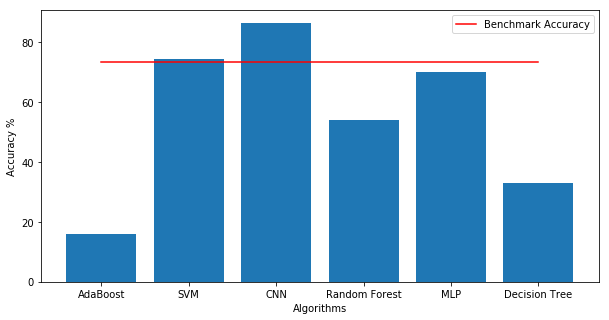

In [42]:
plt.figure(figsize=(10, 5))
x = list(range(6))
y = np.ones(6)*73.4
plt.plot(x, y, color='r', label="Benchmark Accuracy")
plt.legend()
plt.bar(x, accuracy_values.values())
plt.xticks(x, accuracy_values.keys())
plt.xlabel('Algorithms')
plt.ylabel('Accuracy %')
plt.show()

# Model Evaluation
## Confusion On test set

In [33]:
y_test_pred = np.argmax(cnn_model.predict(x_test_reshape), axis=1)
confusion = np.array([y_test != y_test_pred+1]).reshape(y_test.shape)
print('There are', confusion.sum(),'confusion sample')
confusion_df = pd.DataFrame()
confusion_df['true_label'] = [arabic_labels[i-1] for i in y_test[confusion]]
confusion_df['pred_label'] = [arabic_labels[i] for i in y_test_pred[confusion]]
confusion_df['true_letter'] = [arabic_letters[i-1] for i in y_test[confusion]]
confusion_df['pred_letter'] = [arabic_letters[i] for i in y_test_pred[confusion]]
from IPython.display import display
display(confusion_df.set_index('true_label'))

There are 469 confusion sample


,pred_label,true_letter,pred_letter
true_label,,,
taa,thaa,ت,ث
haa,khaa,ح,خ
raa,zay,ر,ز
ttaa,zaa,ط,ظ
qaf,sheen,ق,ش
khaa,haa,خ,ح
khaa,haa,خ,ح
thal,ttaa,ذ,ط
ain,ghain,ع,غ


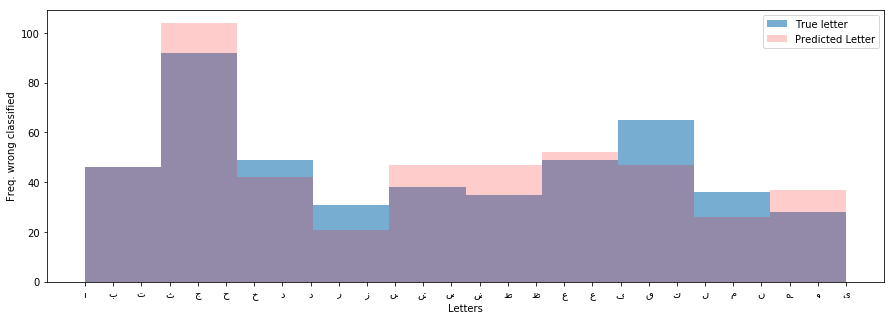

In [34]:
plt.figure(figsize=(15, 5))
plt.hist(confusion_df['true_letter'], alpha=0.6, label= "True letter")
plt.hist(confusion_df['pred_letter'], color='r', alpha=0.2, label='Predicted Letter')
plt.legend()
plt.xlabel('Letters')
plt.ylabel('Freq. wrong classified')
plt.show()

## Confusion Visualization

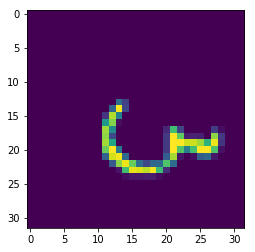

This image predicted as letter  seen  =  س
And that is right


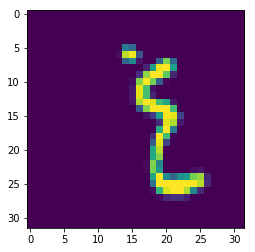

This image predicted as letter  ghain  =  غ
And that is right


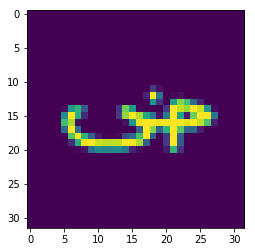

This image predicted as letter  sad  =  ص
But sorry that is wrong


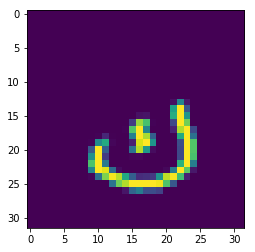

This image predicted as letter  kaf  =  ك
And that is right


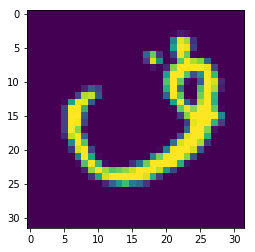

This image predicted as letter  faa  =  ف
But sorry that is wrong


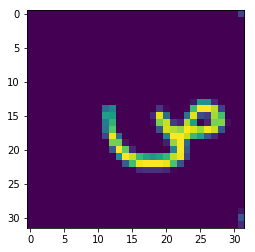

This image predicted as letter  sad  =  ص
And that is right


In [30]:
random_imgs = np.random.randint(x_test.shape[0], size=6)
for i in random_imgs:
    img = x_test_reshape[i]
    # show image
    plt.imshow(img.squeeze().T)
    plt.show()
    img = img.reshape(1, 32, 32)
    pred_matrix = cnn_model.predict(img)
    pred = np.argmax(pred_matrix)
    #print(pred)
    #print(pred_matrix)
    print ("This image predicted as letter ", arabic_labels[pred], ' = ', arabic_letters[pred])
    # Check if predicted label equal to the True label
    if pred+1 == y_test[i]:
        print("And that is right")
    else:
        print("But sorry that is wrong")

## On images from my computer

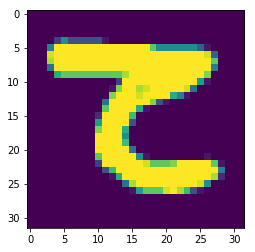

This image predicted as letter  meem  =  م
But sorry that is wrong


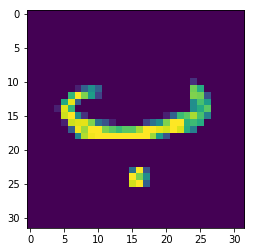

This image predicted as letter  baa  =  ب
And that is right


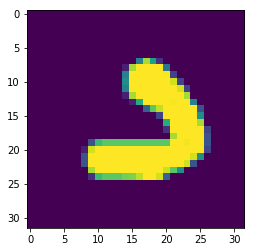

This image predicted as letter  meem  =  م
But sorry that is wrong


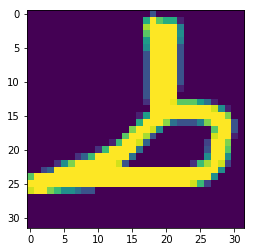

This image predicted as letter  ttaa  =  ط
And that is right


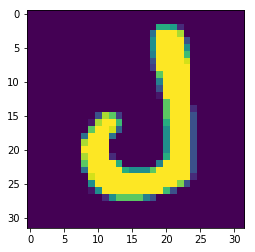

This image predicted as letter  lam  =  ل
And that is right


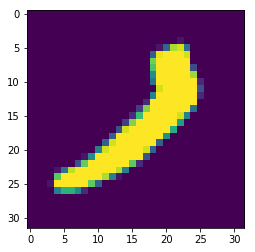

This image predicted as letter  haa  =  هـ
But sorry that is wrong


In [62]:
# load path for my images
from glob import glob
my_imgs = np.array(glob("my_img/*.png"))
import re
import cv2
for path in my_imgs:
    #path = my_imgs[0]
    img = cv2.imread(path)
    # convert image to gray
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # show image
    plt.imshow(gray.squeeze().T)
    plt.show()
    # Preprocessing
    gray = normalize(gray / 255.0).reshape(1, 32, 32)
    # predict image label
    pred_matrix = cnn_model.predict(gray)
    pred = np.argmax(pred_matrix)
    #print(pred)
    #print(pred_matrix)
    # Show the results
    print ("This image predicted as letter ", arabic_labels[pred], ' = ', arabic_letters[pred])
    # Check if predicted label equal to the True label (extacted from image name in it's path)
    if pred == int(re.search(r"[0-9]+", path).group()):
        print("And that is right")
    else:
        print("But sorry that is wrong")

* As a result for all trials and testing the CNN model shows the best accuracy with 86% even we use a architecture.
* The model passed the benchmark metric.

# Conclusion

* The Deep Learning Convolution Neural Networks are very promised in Computer Vision and Handwritten Arabic OCR fields. Also Support Vector Machines algorithm can used in this fields as a cheaper solution with reasonable accuracy.
* The CNN model can be improved using the power of GPUs  by using augmentation, randomization and transfer learning.  